all libraries

In [1]:
!pip install seaborn
!pip install sentence-transformers
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

loading the dataset and splitting it

In [5]:
file_path = "prompt_tier_dataset.json"  # update path if needed
with open(file_path, "r") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and labels
X = df["prompt"]
y = df["tier"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Load the sentencd-BERT model and convert text to embeddings

In [7]:
model = SentenceTransformer("all-MiniLM-L6-v2")

# Convert text to embeddings
X_train_emb = model.encode(X_train.tolist(), convert_to_numpy=True)
X_test_emb = model.encode(X_test.tolist(), convert_to_numpy=True)


Training svm (rbf for non linearity)

In [9]:
svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train_emb, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Predictions and evaluation

In [10]:
y_pred = svm_model.predict(X_test_emb)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
import joblib

# assuming your trained model is in 'svm_model'
joblib.dump(svm_model, "prompt_quality_model.pkl")

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      Tier 1       1.00      1.00      1.00        50
      Tier 2       1.00      1.00      1.00        50
      Tier 3       1.00      1.00      1.00        50
      Tier 4       1.00      1.00      1.00        50

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



['prompt_quality_model.pkl']

Confusion matrix

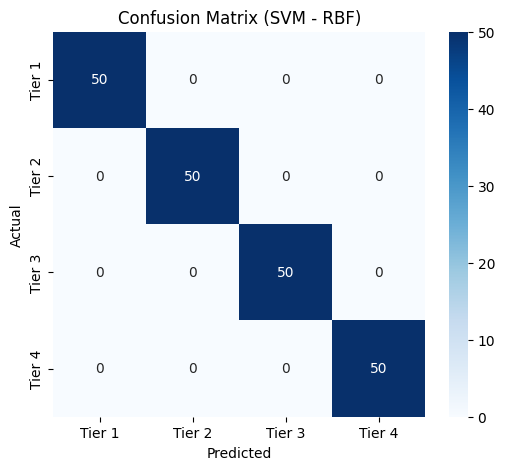

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Confusion Matrix (SVM - RBF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

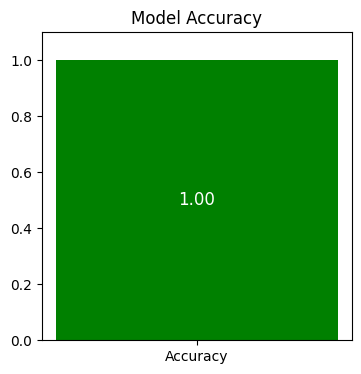

In [ ]:
plt.figure(figsize=(4,4))
plt.bar(["Accuracy"], [accuracy], color="green")
plt.ylim(0, 1.1)
plt.title("Model Accuracy")
plt.text(0, accuracy/2, f"{accuracy:.2f}", ha="center", va="center",
         fontsize=12, color="white")
plt.show()

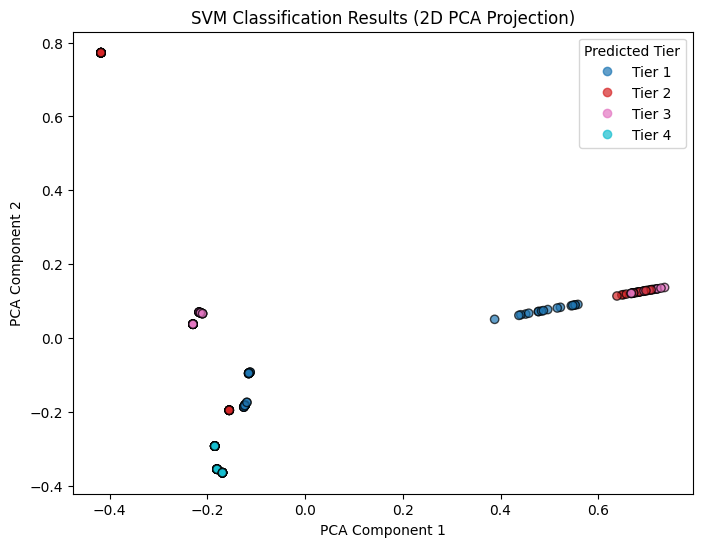

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_test_2d = pca.fit_transform(X_test_tfidf.toarray())

# Scatter plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_test_2d[:,0], X_test_2d[:,1],
    c=pd.Categorical(y_pred).codes,  # colors by predicted class
    cmap="tab10", alpha=0.7, edgecolor="k"
)

# Add legend with class labels
handles, _ = scatter.legend_elements()
plt.legend(handles, svm_model.classes_, title="Predicted Tier")
plt.title("SVM Classification Results (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()